In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format 
# Read data DIctionary FIle
data_dictionary_file = '/Users/nishitgoyal/Documents/Personal Docs/Data Sceince/Module 1/EDTA/lending_case_study/Data_Dictionary.xlsx'

# Read the CSV file into a Pandas DataFrame
df = pd.read_excel(data_dictionary_file)

print(df.head())

            LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...


In [260]:
#Now read the loan csv file
loan_csv_file_path = '/Users/nishitgoyal/Documents/Personal Docs/Data Sceince/Module 1/EDTA/lending_case_study/loan.csv'
df = pd.read_csv(loan_csv_file_path)


/var/folders/_5/y3b5nq9n1zb29s83bjdhg6d40000gn/T/ipykernel_70389/1761608440.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(loan_csv_file_path)


In [261]:
df.describe
df.shape

(39717, 111)

In [262]:
columns_with_all_missing_or_NA = df.columns[df.isna().all()]

# Print the columns with all missing values
print(columns_with_all_missing_or_NA)

#check is rows is empty

print(df.isna().all(axis=1).sum())
#no row with all empty

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [263]:
#drop columns which are either haing mssing or NA values
df=df.drop(columns=columns_with_all_missing_or_NA)

In [264]:
df.shape
#left with 57 columnns now

(39717, 57)

In [265]:
#still can observe some columns with 0.0 or NAN.Lets remove them also
# Find columns with values equal to 0.0 or NaN
columns_with_zeros_or_nan_only = df.columns[(df == 0.0).all() | df.isna().all()]
print(columns_with_zeros_or_nan_only)
#remove them


Index(['acc_now_delinq', 'delinq_amnt'], dtype='object')


In [44]:
#drop such columns and again shows existing columns
df=df.drop(columns=columns_with_zeros_or_nan_only)
#do describe
df.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000          4975.00   
1      1077430    1314167       2500         2500          2500.00   
2      1077175    1313524       2400         2400          2400.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500          1075.00   
39713    90665      90607       8500         8500           875.00   
39714    90395      90390       5000         5000          1325.00   
39715    90376      89243       5000         5000           650.00   
39716    87023      86999       7500         7500           800.00   

             term int_rate  installment grade sub_grade  ... last_pymnt_d  \
0       36 months   10.65%       162.87     B   

In [255]:
#post executing describe,seems still come columns might have single type of values or just 0 or Nan values.
#See output of above describe to get insights.Lets check these columns and clean them if needed


columns_to_check = ['tax_liens', 'pub_rec_bankruptcies', 'chargeoff_within_12_mths',
                    'application_type', 'policy_code', 'collections_12_mths_ex_med','pymnt_plan']
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f'Unique values for {column}: {unique_values}')

#Output
#Unique values for tax_liens: [ 0. nan]
#Unique values for pub_rec_bankruptcies: [ 0.  1.  2. nan]
#Unique values for chargeoff_within_12_mths: [ 0. nan]
#Unique values for application_type: ['INDIVIDUAL']
#Unique values for policy_code: [1]
#Unique values for collections_12_mths_ex_med: [ 0. nan]

#output shows we can ignore columns tax_liens,chargeoff_within_12_mths,application_type,policy_code,collections_12_mths_ex_med
#as either they have single unique value or single unique value+NAN



Unique values for tax_liens: [ 0. nan]
Unique values for pub_rec_bankruptcies: [ 0.  1.  2. nan]
Unique values for chargeoff_within_12_mths: [ 0. nan]
Unique values for application_type: ['INDIVIDUAL']
Unique values for policy_code: [1]
Unique values for collections_12_mths_ex_med: [ 0. nan]
Unique values for pymnt_plan: ['n']


In [266]:
#lets clean the df by dropping these columns
columns_to_drop = ['tax_liens', 'chargeoff_within_12_mths',
                    'application_type', 'policy_code', 'collections_12_mths_ex_med','pymnt_plan']
df = df[[col for col in df.columns if col not in columns_to_drop]]
df.describe    

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000          4975.00   
1      1077430    1314167       2500         2500          2500.00   
2      1077175    1313524       2400         2400          2400.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500          1075.00   
39713    90665      90607       8500         8500           875.00   
39714    90395      90390       5000         5000          1325.00   
39715    90376      89243       5000         5000           650.00   
39716    87023      86999       7500         7500           800.00   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [267]:
#now let us check whether we have any column whose all rows are null
print(df.isnull().all(axis=1).sum())
#we are good at this
df.shape

#we are left with 51 columns now


0


(39717, 51)

In [268]:
#There are two columns where we can see have numerical + charcters.Lets try to clean/transform these columns for computations
df['emp_length'].fillna(0, inplace=True)
df['emp_length'].head()
df['emp_length'].describe()
df['emp_length'].unique()

def extract_numeric_years(value):
    if isinstance(value, str):
        if value == '< 1 year':
            return 0
        else:
            # Extract numeric part using regular expressions
            import re
            numeric_part = re.search(r'\d+', value)
            if numeric_part:
                return int(numeric_part.group())
            else:
                return None  # Handle other cases as needed
    elif isinstance(value, int):
        return value  # If it's already an integer, return it as is
    else:
        return None  # Handle other cases as needed

df['emp_length'] = df['emp_length'].apply(extract_numeric_years)

df['emp_length'].unique()
#now we have emp lenght in numeric term,which will help us in analysing 

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [269]:
print(df.shape)
#if any column contains 0 or nan only,then it is of no use.Lets check if we have any such columne
filtered_columns = df.columns[df.isin([0, np.nan]).all()]

# Drop the filtered columns from the DataFrame
df = df.drop(columns=filtered_columns)
print(df.shape)
df.describe()
df.describe
print(df.dtypes)


df['int_rate']=df['int_rate'].str.rstrip('%')

#There are certain columns which we need in int type to do further analysis
cols_to_numeric=['int_rate']
df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric)
print("-------------------------------------------------------")
print(df.dtypes)

(39717, 51)
(39717, 49)
id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                   int64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     floa

count   39717.00
mean       12.02
std         3.72
min         5.42
25%         9.25
50%        11.86
75%        14.59
max        24.59
Name: int_rate, dtype: float64
3.724825435114362
4949
count   34768.00
mean       11.78
std         2.96
min         6.54
25%         9.63
50%        11.71
75%        13.98
max        17.58
Name: int_rate, dtype: float64


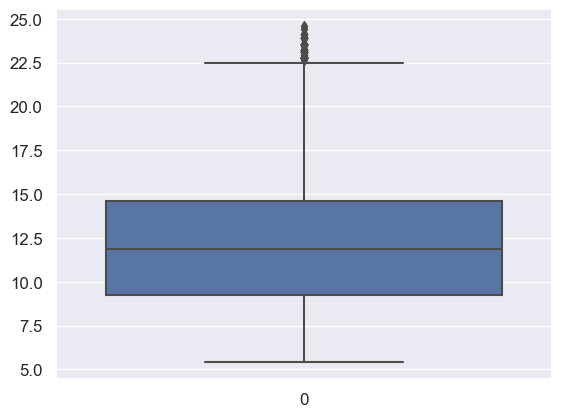

In [152]:
#check outliers in int_rate
print(df['int_rate'].describe())
#interest rate
sns.boxplot(df.int_rate)

#interest rate po

mean=df.int_rate.mean()
df_std=df.int_rate.std();
print(df_std)
z_score=abs((df.int_rate-mean)/df_std)
count_records = (z_score >= 1.5).sum()

print(count_records)

df=df[z_score <= 1.5]
print(df.int_rate.describe())

#count is zero,so no outliers for interest rate




<Axes: >

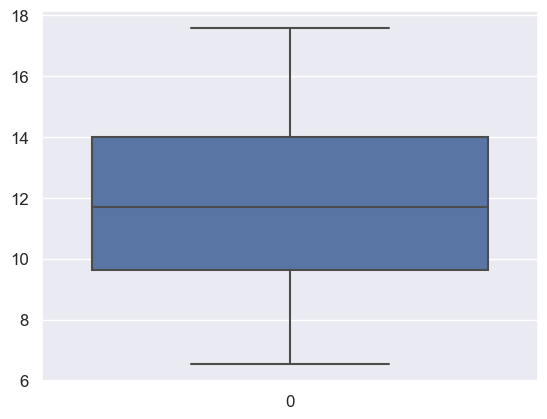

In [153]:
sns.boxplot(df.int_rate)

<Axes: >

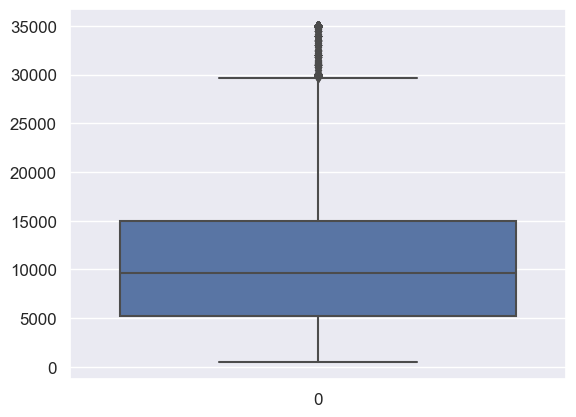

In [154]:
#check outliers in loan_amnt
sns.boxplot(df.loan_amnt)



In [271]:
print(df.loan_amnt.describe())


#lets try to remove outliers from loan amount
mean=df.loan_amnt.mean()
df_std=df.loan_amnt.std();
print(df_std)
z_score=abs((df.loan_amnt-mean)/df_std)
print(z_score)
df=df[z_score <= 1.5]
print(df.loan_amnt.describe())

#we can see difference in box plot after removing outlier

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64
7456.670694101286
0       0.83
1       1.17
2       1.18
3       0.16
4       1.10
        ... 
39712   1.17
39713   0.36
39714   0.83
39715   0.83
39716   0.50
Name: loan_amnt, Length: 39717, dtype: float64
count   35823.00
mean     9449.30
std      5276.84
min       500.00
25%      5000.00
50%      8500.00
75%     13000.00
max     22400.00
Name: loan_amnt, dtype: float64


<Axes: >

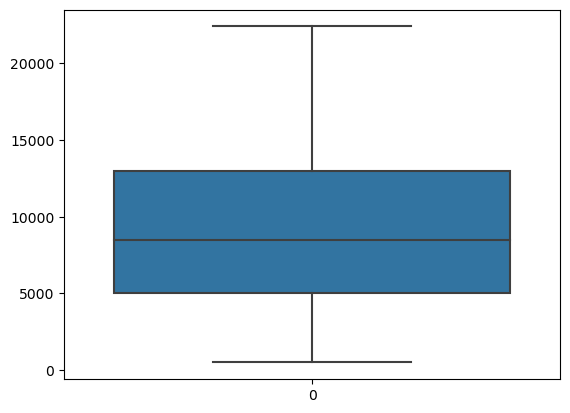

In [83]:
sns.boxplot(df.loan_amnt)

count     31634.00
mean      63747.19
std       58961.91
min        4000.00
25%       39000.00
50%       54996.00
75%       76000.00
max     6000000.00
Name: annual_inc, dtype: float64
58961.90576942328
count    30823.00
mean     58918.83
std      27881.27
min       4000.00
25%      38400.00
50%      54000.00
75%      75000.00
max     152004.00
Name: annual_inc, dtype: float64


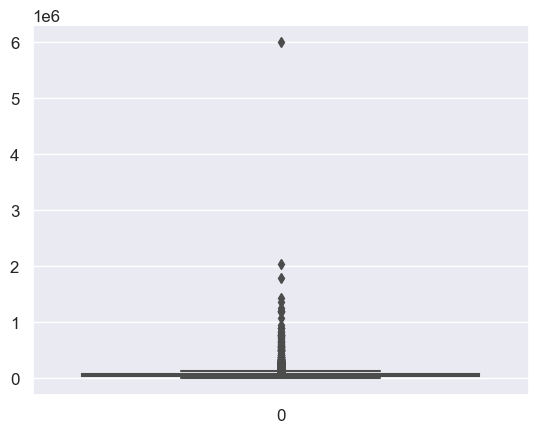

In [156]:


#let us check outliers in annual income
print(df['annual_inc'].describe())
#annual_inc before removing outliers
sns.boxplot(df.annual_inc)


mean=df.annual_inc.mean()
df_std=df.annual_inc.std();
print(df_std)
z_score=abs((df.annual_inc-mean)/df_std)
df=df[z_score <= 1.5]
print(df.annual_inc.describe())

#To identify outlier we are using below algo
#find zscore =  x-mean/std
#if zscore>1.5,then it is outlier



<Axes: >

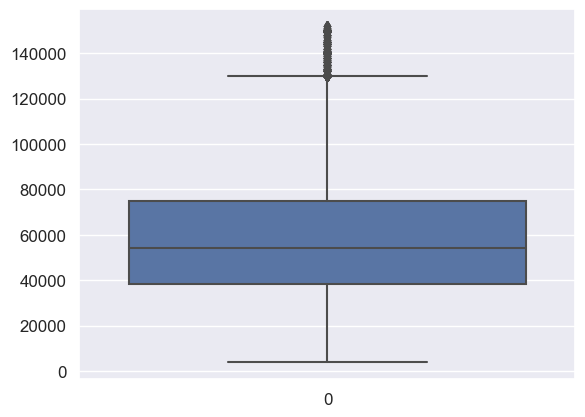

In [157]:
##annual_inc after removing outliers
sns.boxplot(df.annual_inc)

In [90]:
df.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000          4975.00   
1      1077430    1314167       2500         2500          2500.00   
2      1077175    1313524       2400         2400          2400.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
...        ...        ...        ...          ...              ...   
39711    92402      92390       5000         5000           700.00   
39712    92187      92174       2500         2500          1075.00   
39713    90665      90607       8500         8500           875.00   
39714    90395      90390       5000         5000          1325.00   
39716    87023      86999       7500         7500           800.00   

             term  int_rate  installment grade sub_grade  ...  \
0       36 months     10.65       162.87     B        B2  ..

/var/folders/_5/y3b5nq9n1zb29s83bjdhg6d40000gn/T/ipykernel_70389/2977954442.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'], kde=False, color='red', bins=100)


<Axes: xlabel='loan_amnt'>

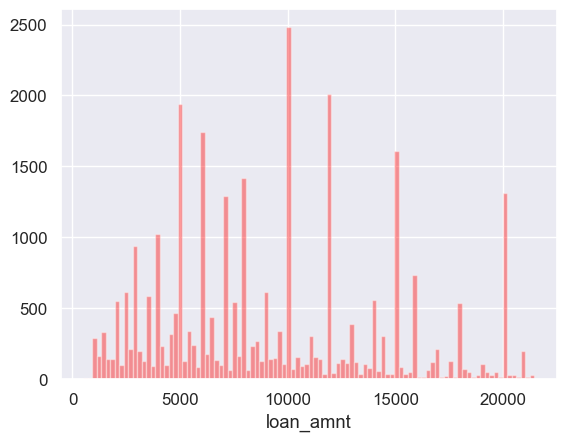

In [162]:

sns.distplot(df['annual_inc'], kde=False, color='red', bins=100)
#mostly annual income is between 25k-80k


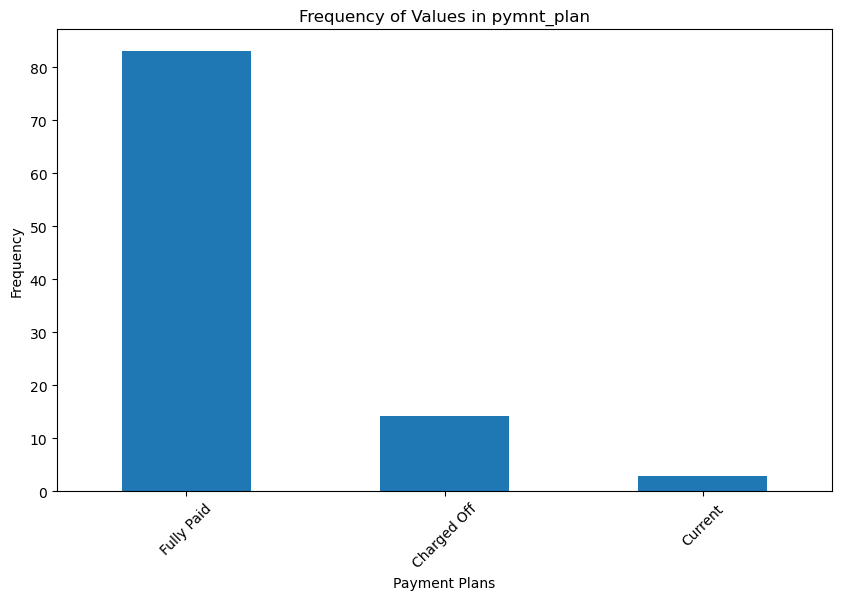

In [107]:
#lets group by loan_status percentage
value_counts = df['loan_status'].value_counts()
total_count = len(df)

# Calculate the percentage for each value
value_percentages = (value_counts / total_count) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
ax = value_percentages.plot(kind='bar')
plt.title('Frequency of Values in pymnt_plan')
plt.xlabel('Payment Plans')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability

plt.show()

#around 15-20% of toal loans are charged off


In [163]:
print(df.dtypes)

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                   int64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_deli

In [170]:
df.dti.describe()
#high debt to income ratio for more than 50% of people


count   30823.00
mean       13.46
std         6.67
min         0.00
25%         8.36
50%        13.55
75%        18.73
max        29.99
Name: dti, dtype: float64

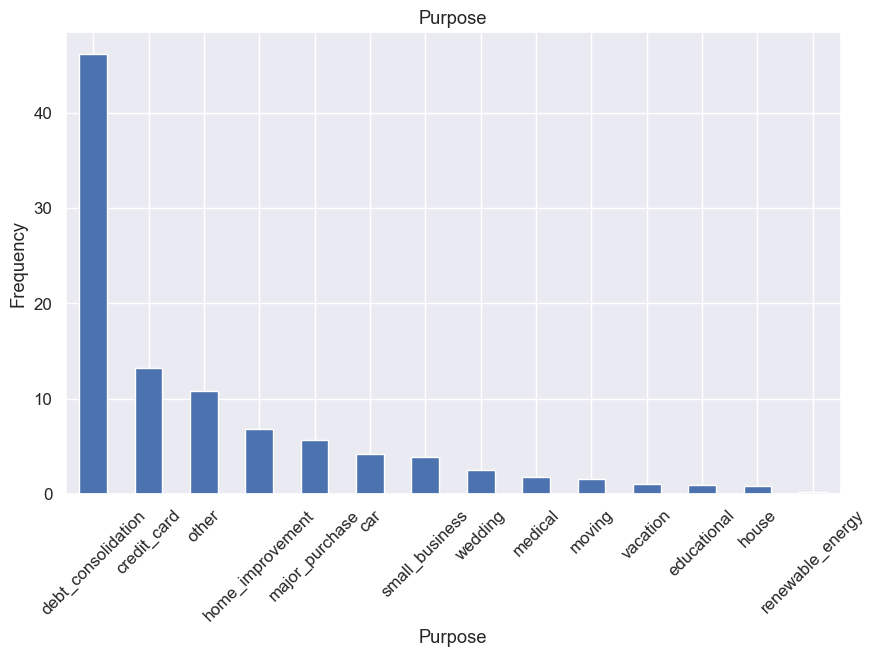

In [211]:
value_counts = df['purpose'].value_counts()
total_count = len(df)

# Calculate the percentage for each value
value_percentages = (value_counts / total_count) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
ax = value_percentages.plot(kind='bar')
plt.title('Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability

plt.show()

#Observation---Mostly people are taking loan to pay off old loans

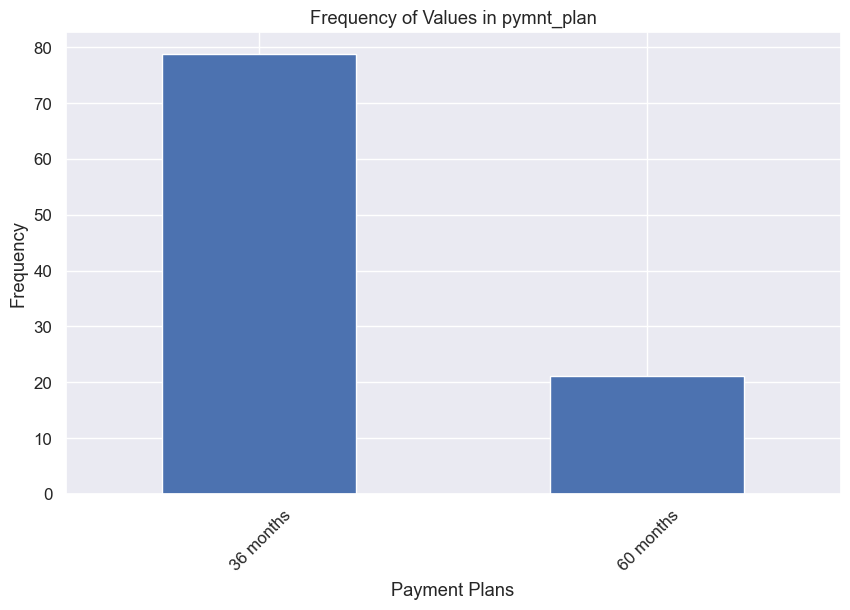

In [166]:
value_counts = df['term'].value_counts()
total_count = len(df)

# Calculate the percentage for each value
value_percentages = (value_counts / total_count) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
ax = value_percentages.plot(kind='bar')
plt.title('term of loan')
plt.xlabel('term')
plt.ylabel('percentage')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability

#80% of loan is for short period
plt.show()

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                   int64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_deli

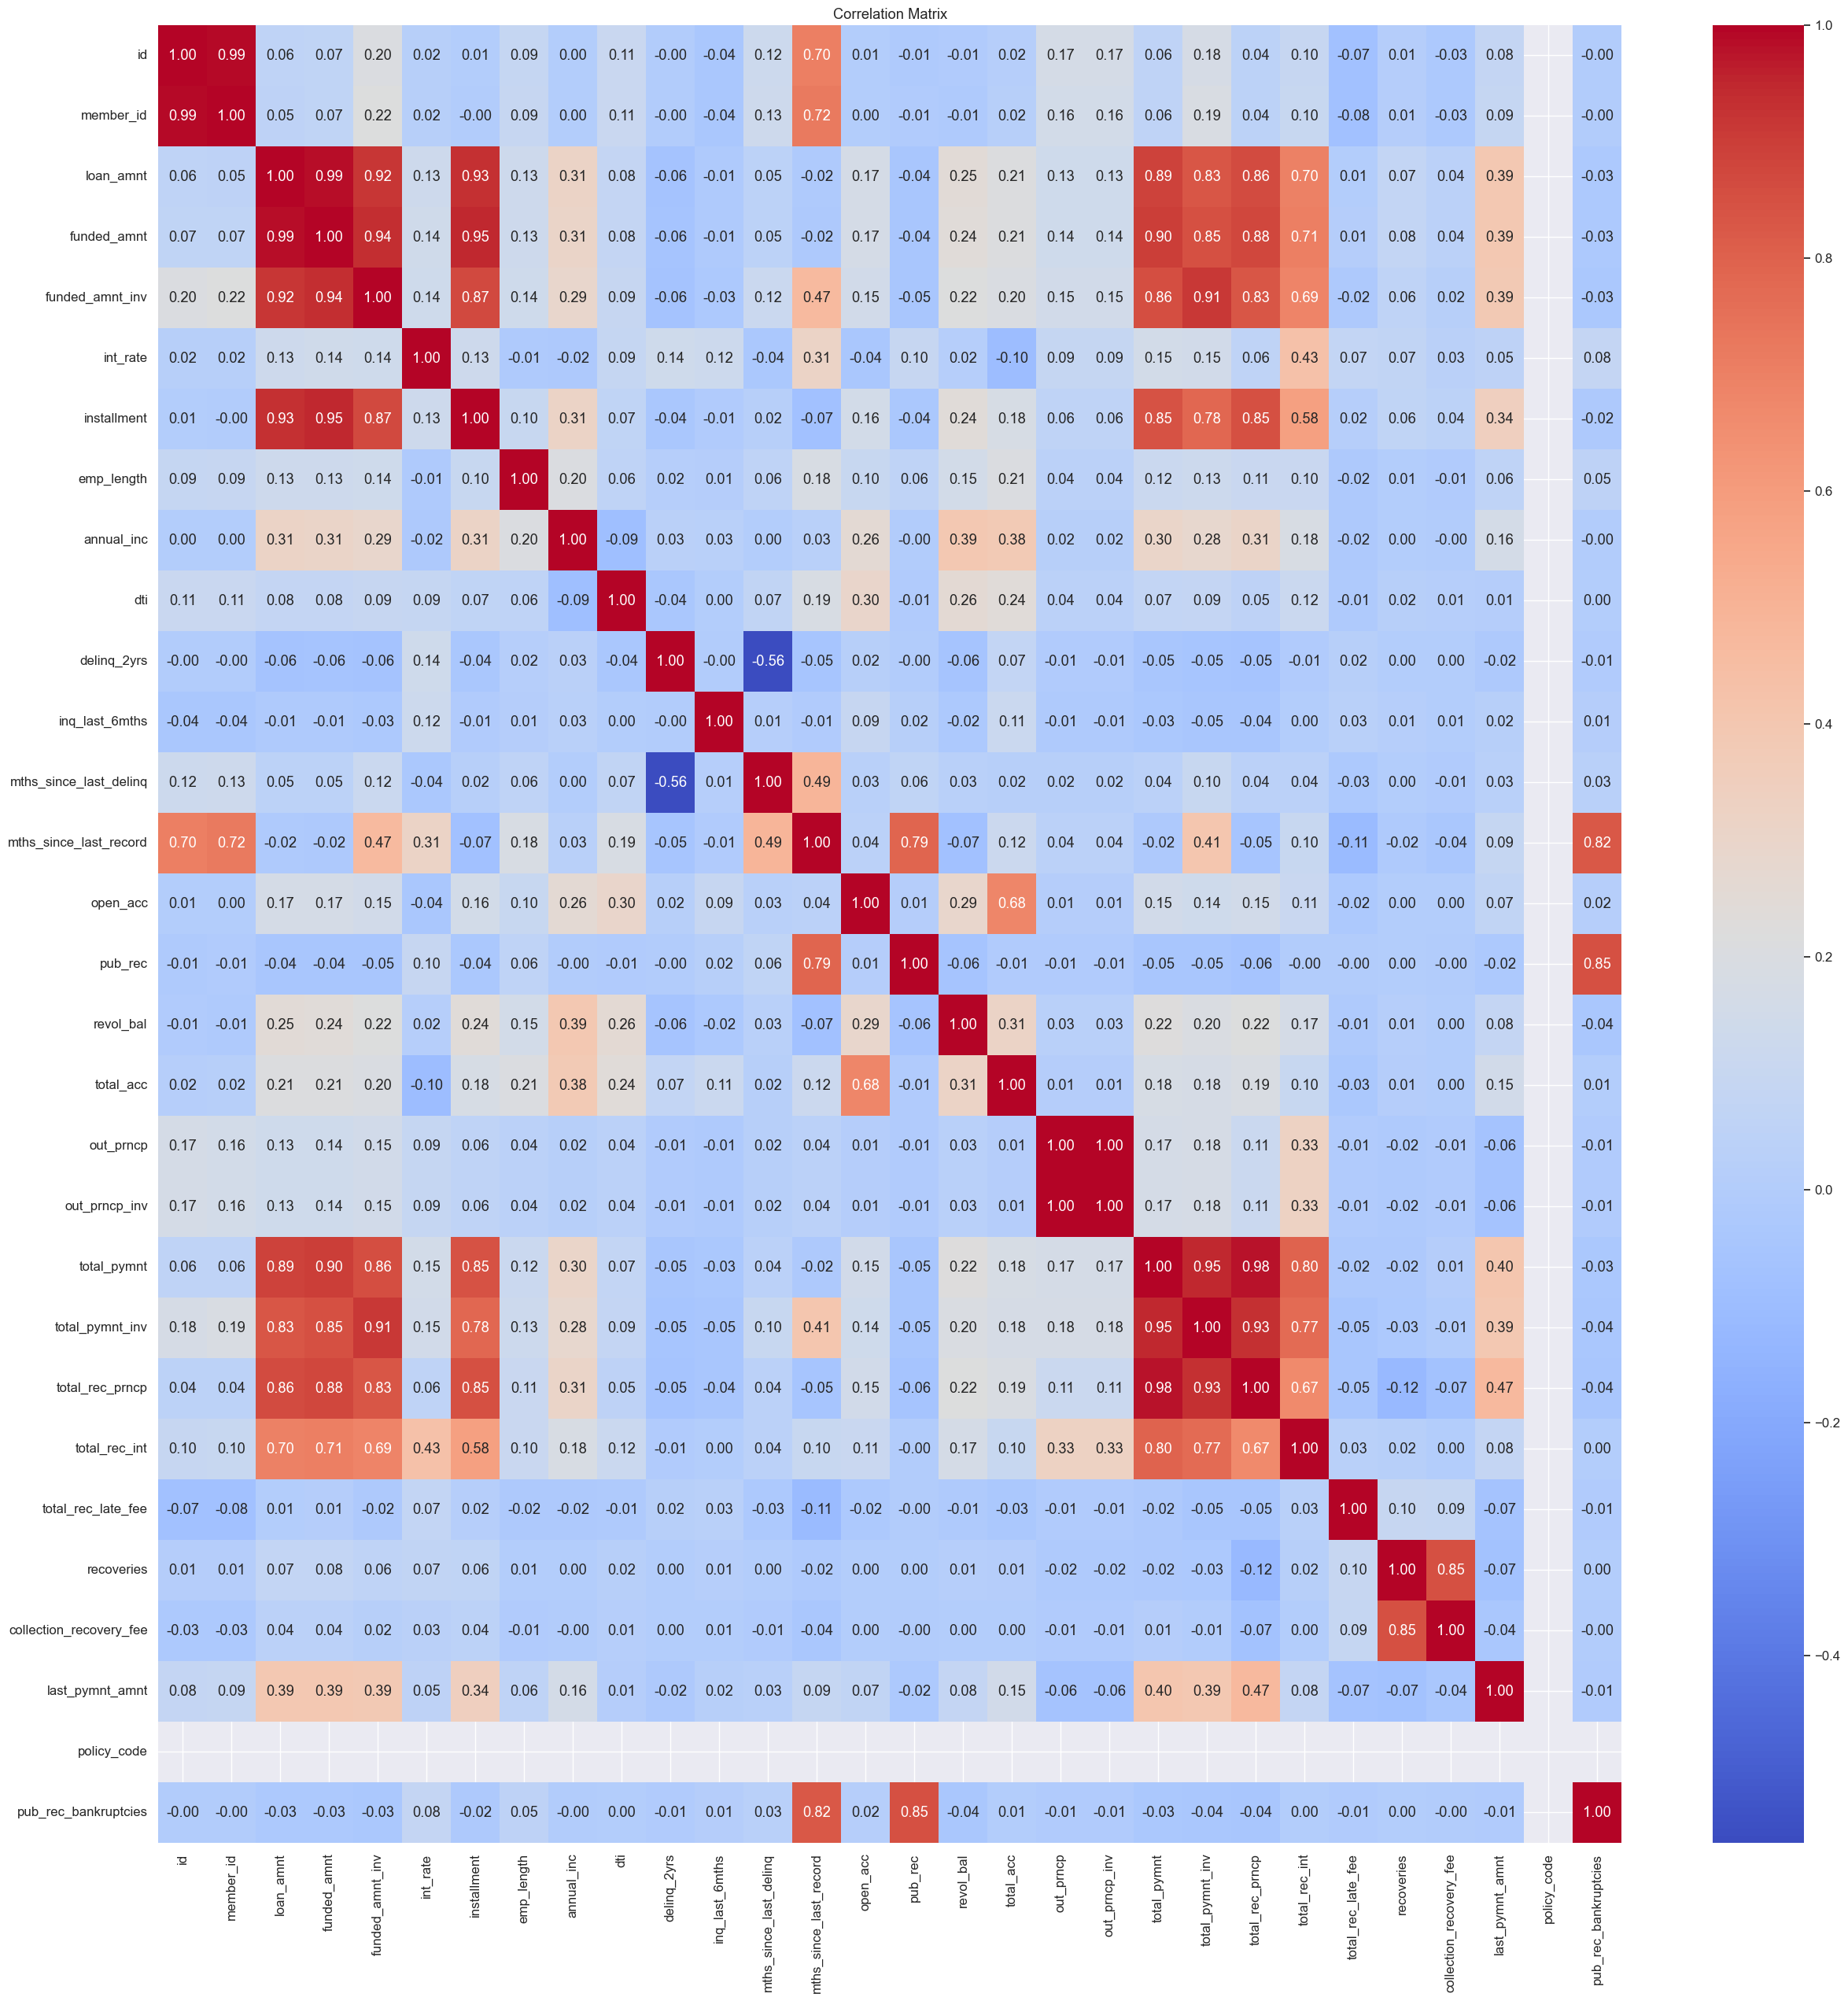

In [161]:
print(df.dtypes)
#Lets Do Bivariate analysis now
numeric_columns = df.select_dtypes(include=['number'])



# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [ ]:
#let us do some analysis of the above corrleation matrix
#loan amount,funded_amnt,funded_amnt_inv,installment -- strongly correlated with each other
#----->if loan amount is more installment is more

#total_pymnt,total_pymnet_iv,total_rec_prcp are storngly correlated with each other

#out _prncp and out_prncpl_inv is storngly corrleated

#loan_amnt is negatively correlated with delinq_2yrs and pub_rec
#----->more the loan amnt more are instances of not paying emi
#dti is negatively correlated with annual income
#------>dti is more if annual income is less
#int_rate is negatively correlated total_Acc
#delinq_2yrs is negatively correlated with mnthse_since_last_deling


In [ ]:
# ------------- Bivariate Analysis ----------------------#

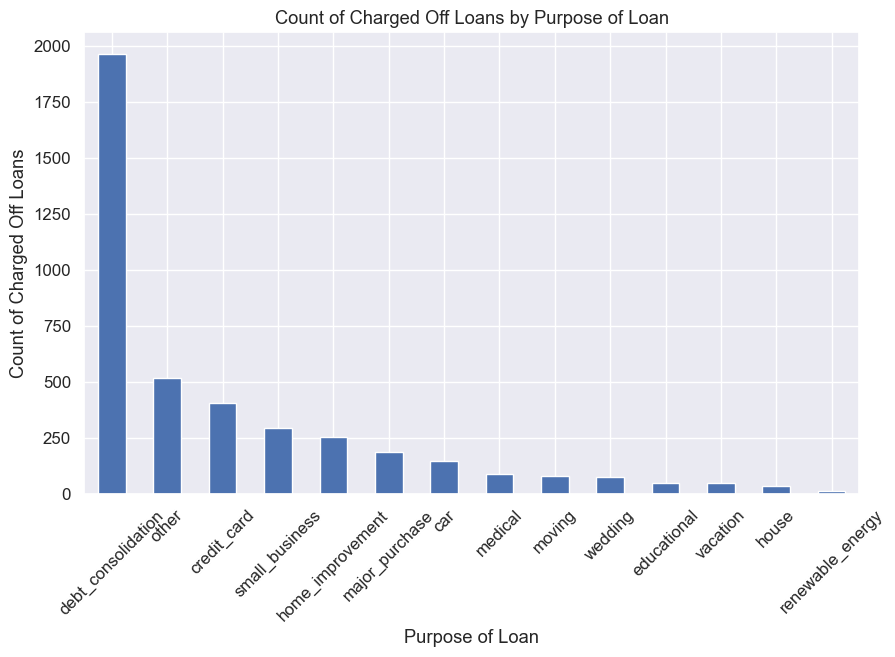

In [197]:

charged_off_df = df[df['loan_status'] == 'Charged Off']


# Count the "charged_off" loans for each purpose of the loan
charge_off_counts = charged_off_df['purpose'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_off_counts.plot(kind='bar')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count of Charged Off Loans')
plt.title('Count of Charged Off Loans by Purpose of Loan')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

#debt consolidation is major one for charged off loan

/var/folders/_5/y3b5nq9n1zb29s83bjdhg6d40000gn/T/ipykernel_70389/581793013.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_df['annual_inc'] = pd.cut(charged_off_df2['annual_inc'], bins=salary_bins, labels=labels)


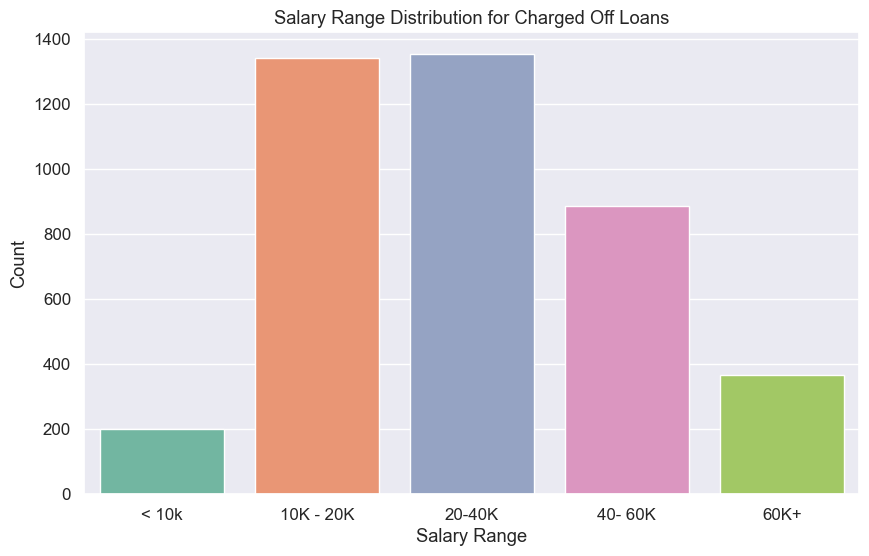

In [210]:
charged_off_df2 = df[df['loan_status'] == 'Charged Off']
charged_off_df2.annual_inc.describe()

#lets do segmented analysis for annual income.We will split salary into different bins as follows
salary_bins = [10000, 20000, 40000, 60000, 90000, float('inf')]  
labels = ['< 10k', '10K - 20K', '20-40K', '40- 60K','60K+']

# Categorize salaries into bins and count the frequency of each bin for charged-off loans
charged_off_df['annual_inc'] = pd.cut(charged_off_df2['annual_inc'], bins=salary_bins, labels=labels)

# Create a bar plot of salary ranges for charged-off loans
plt.figure(figsize=(10, 6))
sns.countplot(data=charged_off_df, x='annual_inc', order=labels, palette='Set2')
plt.xlabel('Salary Range')
plt.ylabel('Count')
plt.title('Salary Range Distribution for Charged Off Loans')
plt.show()

#mostly with annual income of 10-40k loans are charged off

/var/folders/_5/y3b5nq9n1zb29s83bjdhg6d40000gn/T/ipykernel_70389/3806405883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_df3['dti'] = pd.cut(charged_off_df3['dti'], bins=dti_bins, labels=labels)


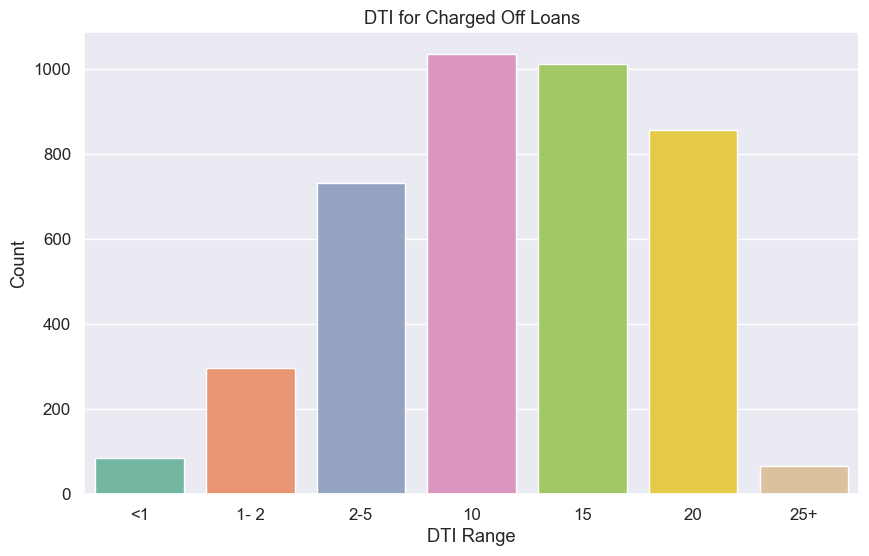

In [230]:
#dti vs charged off
charged_off_df3 = df[df['loan_status'] == 'Charged Off']

#segmentd analysis for dti vs charged off loans
dti_bins = [ 1,2,5, 10, 15, 20,25,30]  
labels = ['<1','1- 2','2-5', '10', '15','20','25+']

# Categorize salaries into bins and count the frequency of each bin for charged-off loans
charged_off_df3['dti'] = pd.cut(charged_off_df3['dti'], bins=dti_bins, labels=labels)

# Create a bar plot of salary ranges for charged-off loans
plt.figure(figsize=(10, 6))
sns.countplot(data=charged_off_df3, x='dti', order=labels, palette='Set2')
plt.xlabel('DTI Range')
plt.ylabel('Count')
plt.title('DTI for Charged Off Loans')
plt.show()

#DTI less than 1,it means less chance of charge off


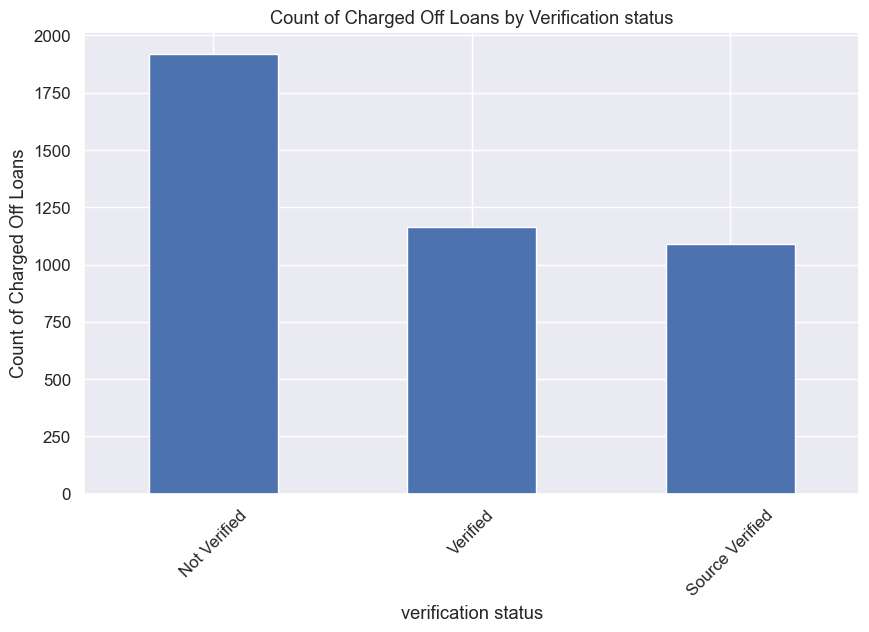

In [233]:
df.verification_status.head()

charged_off_df4 = df[df['loan_status'] == 'Charged Off']


# Count the "charged_off" loans for each purpose of the loan
charge_off_counts4 = charged_off_df['verification_status'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_off_counts4.plot(kind='bar')
plt.xlabel('verification status')
plt.ylabel('Count of Charged Off Loans')
plt.title('Count of Charged Off Loans by Verification status')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()
#if verification is not done there is more chance of charge off loans

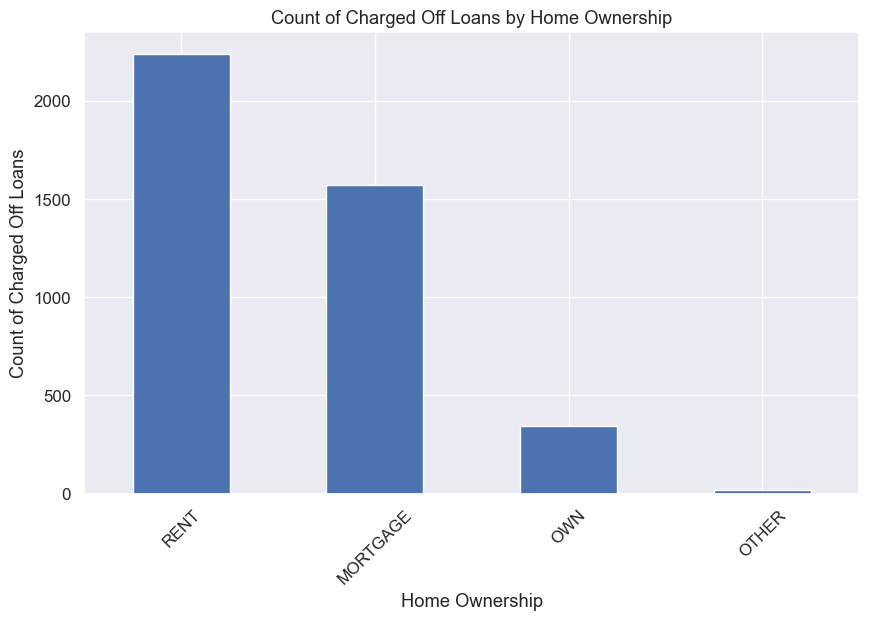

In [234]:
charged_off_df = df[df['loan_status'] == 'Charged Off']


# Count the "charged_off" loans for each home ownershup
charge_off_counts = charged_off_df['home_ownership'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_off_counts.plot(kind='bar')
plt.xlabel('Home Ownership')
plt.ylabel('Count of Charged Off Loans')
plt.title('Count of Charged Off Loans by Home Ownership')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

#if some one owns their own house,then there is less chance of charge off

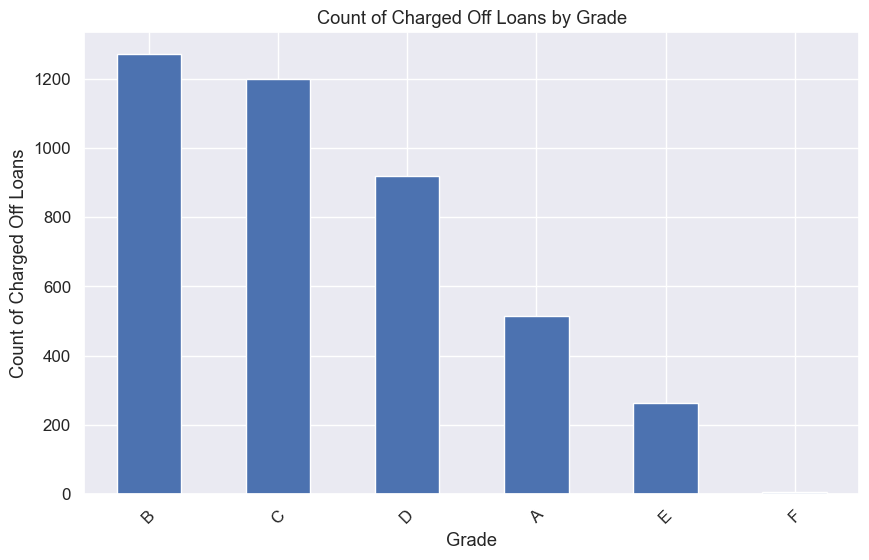

In [235]:
charged_off_df = df[df['loan_status'] == 'Charged Off']


# Count the "charged_off" loans for Grades by LC
charge_off_counts = charged_off_df['grade'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_off_counts.plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Count of Charged Off Loans')
plt.title('Count of Charged Off Loans by Grade')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

#Not clear as E grade has less charge off.May be data is enough for E grade.But lower the grade,more chances for loan to get charged off